In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, Embedding, Input, Flatten, GlobalMaxPooling1D,Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
import nltk
import matplotlib.pyplot as plt
import re
import tensorflow as tf

In [6]:
#資料前處理
#讀csv檔
df = pd.read_csv("yelp.csv")

# 僅保留 "Text"、"Stars"兩個欄位
df = df[['text', 'stars']]

In [7]:
# 將 "Stars" 欄位大於等於 4 的轉成 1，其他轉成 0
df['stars'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)

# 將 "Text" 欄位內的文字利用分割符號切割 (這裡以空白為分割符號，根據實際情況可以更改)
df['text'] = df['text'].apply(lambda x: x.split())

# 查看處理後的資料
print(df.head())


                                                text  stars
0  [My, wife, took, me, here, on, my, birthday, f...      1
1  [I, have, no, idea, why, some, people, give, b...      1
2  [love, the, gyro, plate., Rice, is, so, good, ...      1
3  [Rosie,, Dakota,, and, I, LOVE, Chaparral, Dog...      1
4  [General, Manager, Scott, Petello, is, a, good...      1


In [8]:
#  去除停頓詞stop words 
#下載NLTK 的 stopwords 資料
nltk.download('stopwords')

# 從 NLTK 中載入英語停頓詞，並將其轉換為列表格式
stop_words = list(stopwords.words('english'))


# 初始化 CountVectorizer，其中 stop_words=stop_words 表示在向量化時自動過濾掉指定的停頓詞。
vectorizer = CountVectorizer(stop_words=stop_words)

# 將文本轉換為詞頻矩陣
X_counts = vectorizer.fit_transform(df['text'].apply(lambda x: ' '.join(x)))


#確保去除停頓詞
print(vectorizer.vocabulary_)

# 查看詞彙矩陣
print(X_counts.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'wife': 28372, 'took': 26332, 'birthday': 3037, 'breakfast': 3620, 'excellent': 9302, 'weather': 28140, 'perfect': 18934, 'made': 15545, 'sitting': 23380, 'outside': 18180, 'overlooking': 18252, 'grounds': 11669, 'absolute': 666, 'pleasure': 19438, 'waitress': 27940, 'food': 10329, 'arrived': 1835, 'quickly': 20477, 'semi': 22737, 'busy': 4050, 'saturday': 22302, 'morning': 16823, 'looked': 15287, 'like': 15012, 'place': 19339, 'fills': 9943, 'pretty': 19938, 'earlier': 8520, 'get': 11087, 'better': 2904, 'favor': 9733, 'bloody': 3213, 'mary': 15900, 'phenomenal': 19070, 'simply': 23312, 'best': 2882, 'ever': 9230, 'sure': 25179, 'use': 27421, 'ingredients': 13328, 'garden': 10917, 'blend': 3158, 'fresh': 10585, 'order': 18031, 'amazing': 1342, 'everything': 9245, 'menu': 16234, 'looks': 15292, 'white': 28317, 'truffle': 26727, 'scrambled': 22539, 'eggs': 8674, 'vegetable': 27579, 'skillet': 23432, 'tasty': 25620, 'delicious': 7299, 'came': 4234, 'pieces': 19187, 'griddled': 11593, 'b

In [9]:
#建立train&test之DataFrame
df_train, df_test = train_test_split(df, test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
x_train = df_train['text'].tolist()
y_train = np.asarray( df_train['stars'] ).astype(np.float32)
x_test = df_test['text'].tolist()
y_test = np.asarray( df_test['stars'] ).astype(np.float32)


In [11]:
#建立token字典
token = Tokenizer(num_words=5000)
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)
x_train = pad_sequences(x_train, maxlen=500)
x_test = pad_sequences(x_test, maxlen=500)

In [12]:
#2. 建模
#a. 分別用CNN與LSTM對train的資料進行建模，可自行設計神經網路的架構
#b. 加入Dropout Layer設定Dropout參數(建議0.7)進行比較
#c. plot出訓練過程中的Accuracy與Loss值變化

In [39]:
#CNN without dropout
model_CNN=Sequential()

#Embedding層將數字list轉換為向量list
model_CNN = Sequential([
    Input(shape=(500,)),
    Embedding(input_dim=10000, output_dim=128)
])
#建立捲積層1
model_CNN.add(Conv1D(filters=50,#隨機產生幾個filter weight
                 kernel_size=2,#濾鏡大小
                 activation='relu'))#ReLU激活函數
#建立池化層1
model_CNN.add(MaxPooling1D(pool_size=2))

#建立平坦層
model_CNN.add(Flatten())

#建立隱藏層
model_CNN.add(Dense(50,activation='relu'))

#建立輸出層
model_CNN.add(Dense(1,activation='sigmoid'))

model_CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)    │ (None, 500, 128)    │   1,280,000 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ conv1d_1 (Conv1D)          │ (None, 499, 50)     │      12,850 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling1d_1            │ (None, 249, 50)     │           0 │
│ (MaxPooling1D)             │                     │             │
├────────────────────────────┼─────────────────────┼─────────────┤
│ flatten_1 (Flatten)        │ (None, 12450)       │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_2 (Dense)            │ (None, 50)          │     622,550 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_3 (Dense)            │ (None, 1)           │          51 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 1,915,451 (7.31 MB)

 Trainable params: 1,915,451 (7.31 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#定義訓練方式
model_CNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#開始訓練
train_history_CNN = model_CNN.fit(x_train, y_train, validation_split=0.2,
                        batch_size=100, #批次筆數(每次訓練多少批次: 總訓練資料/批次筆數)
                        epochs=10, #訓練週期數(10筆accuracy與loss)
                        verbose=2) #顯示訓練過程   

Epoch 1/10
64/64 - 5s - 79ms/step - accuracy: 0.6777 - loss: 0.6142 - val_accuracy: 0.6900 - val_loss: 0.5657
Epoch 2/10
64/64 - 3s - 45ms/step - accuracy: 0.8044 - loss: 0.4190 - val_accuracy: 0.8000 - val_loss: 0.4398
Epoch 3/10
64/64 - 3s - 46ms/step - accuracy: 0.9031 - loss: 0.2424 - val_accuracy: 0.8144 - val_loss: 0.4651
Epoch 4/10
64/64 - 3s - 46ms/step - accuracy: 0.9528 - loss: 0.1370 - val_accuracy: 0.8087 - val_loss: 0.5067
Epoch 5/10
64/64 - 3s - 47ms/step - accuracy: 0.9795 - loss: 0.0748 - val_accuracy: 0.8175 - val_loss: 0.6134
Epoch 6/10
64/64 - 3s - 46ms/step - accuracy: 0.9894 - loss: 0.0418 - val_accuracy: 0.8012 - val_loss: 0.6734
Epoch 7/10
64/64 - 3s - 46ms/step - accuracy: 0.9952 - loss: 0.0236 - val_accuracy: 0.8075 - val_loss: 0.7603
Epoch 8/10
64/64 - 3s - 45ms/step - accuracy: 0.9967 - loss: 0.0162 - val_accuracy: 0.8000 - val_loss: 0.8077
Epoch 9/10
64/64 - 3s - 45ms/step - accuracy: 0.9978 - loss: 0.0117 - val_accuracy: 0.8000 - val_loss: 0.8675
Epoch 10/1

In [43]:
#畫出accuracy&loss
def show_train_history_CNN(train,val):
    plt.figure()
    plt.plot(train_history_CNN.history[train])
    plt.plot(train_history_CNN.history[val])
    plt.title("CNN without dropout")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

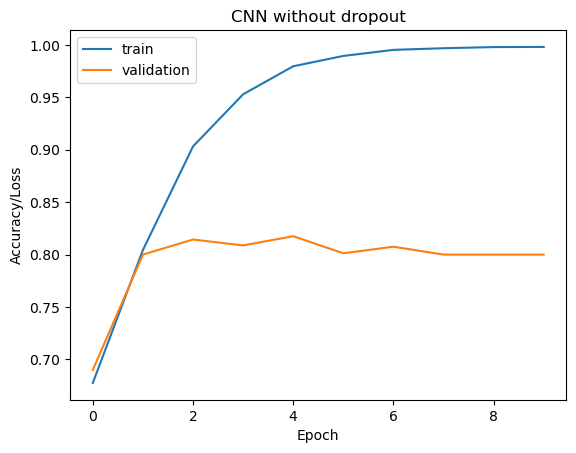

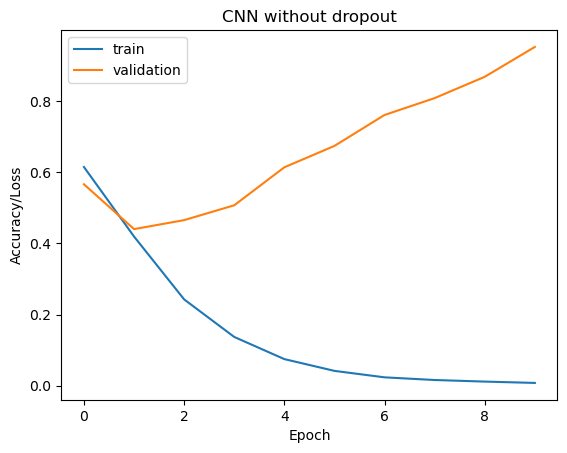

In [45]:
show_train_history_CNN('accuracy', 'val_accuracy')
show_train_history_CNN('loss', 'val_loss')

In [128]:
#評估模型準確度
scores = model_CNN.evaluate(x_test, y_test)#放入測試資料進行評估
print("Accuracy=",scores[1])#列印準確度

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8116 - loss: 0.9346
Accuracy= 0.8034999966621399


In [57]:
#CNN with dropout
model_CNN_D=Sequential()
#Embedding層將數字list轉換為向量list
model_CNN_D = Sequential([
    Input(shape=(500,)),
    Embedding(input_dim=10000, output_dim=128)
])
#建立捲積層1
model_CNN_D.add(Conv1D(filters=50,#隨機產生幾個filter weight
                 kernel_size=2,#濾鏡大小
                 activation='relu'))#ReLU積活函數
#加入dropout
model_CNN_D.add(Dropout(0.7))

#建立池化層1
model_CNN_D.add(MaxPooling1D(pool_size=2))

#建立平坦層
model_CNN_D.add(Flatten())
model_CNN_D.add(Dropout(0.7))

#建立隱藏層
model_CNN_D.add(Dense(50,activation='relu'))
model_CNN_D.add(Dropout(0.7))

#建立輸出層
model_CNN_D.add(Dense(1,activation='sigmoid'))
model_CNN_D.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)    │ (None, 500, 128)    │   1,280,000 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ conv1d_3 (Conv1D)          │ (None, 499, 50)     │      12,850 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_3 (Dropout)        │ (None, 499, 50)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling1d_3            │ (None, 249, 50)     │           0 │
│ (MaxPooling1D)             │                     │             │
├────────────────────────────┼─────────────────────┼─────────────┤
│ flatten_3 (Flatten)        │ (None, 12450)       │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_4 (Dropout)        │ (None, 12450)       │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_6 (Dense)            │ (None, 50)          │     622,550 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_5 (Dropout)        │ (None, 50)          │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_7 (Dense)            │ (None, 1)           │          51 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 1,915,451 (7.31 MB)

 Trainable params: 1,915,451 (7.31 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
#定義訓練方式
model_CNN_D.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#開始訓練
train_history_CNN_D = model_CNN_D.fit(x_train, y_train, validation_split=0.2,
                        batch_size=100, #批次筆數(每次訓練多少批次: 總訓練資料/批次筆數)
                        epochs=10, #訓練週期數(10筆accuracy與loss)
                        verbose=2) #顯示訓練過程   

Epoch 1/10
64/64 - 6s - 95ms/step - accuracy: 0.6784 - loss: 0.6335 - val_accuracy: 0.6787 - val_loss: 0.6238
Epoch 2/10
64/64 - 3s - 54ms/step - accuracy: 0.6828 - loss: 0.6298 - val_accuracy: 0.6787 - val_loss: 0.6230
Epoch 3/10
64/64 - 4s - 55ms/step - accuracy: 0.6834 - loss: 0.6038 - val_accuracy: 0.6787 - val_loss: 0.5855
Epoch 4/10
64/64 - 4s - 55ms/step - accuracy: 0.7120 - loss: 0.5489 - val_accuracy: 0.7206 - val_loss: 0.5072
Epoch 5/10
64/64 - 4s - 56ms/step - accuracy: 0.7736 - loss: 0.4626 - val_accuracy: 0.8081 - val_loss: 0.4413
Epoch 6/10
64/64 - 4s - 55ms/step - accuracy: 0.8208 - loss: 0.3964 - val_accuracy: 0.8181 - val_loss: 0.4187
Epoch 7/10
64/64 - 4s - 55ms/step - accuracy: 0.8536 - loss: 0.3431 - val_accuracy: 0.8175 - val_loss: 0.4161
Epoch 8/10
64/64 - 4s - 55ms/step - accuracy: 0.8734 - loss: 0.3113 - val_accuracy: 0.8269 - val_loss: 0.4287
Epoch 9/10
64/64 - 4s - 58ms/step - accuracy: 0.8838 - loss: 0.2765 - val_accuracy: 0.8288 - val_loss: 0.4347
Epoch 10/1

In [61]:
#畫出accuracy&loss
def show_train_history_CNN_D(train,val):
    plt.figure()
    plt.plot(train_history_CNN_D.history[train])
    plt.plot(train_history_CNN_D.history[val])
    plt.title("CNN with dropout")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

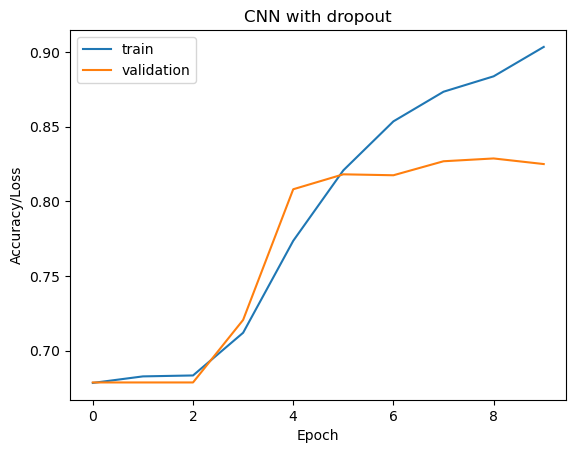

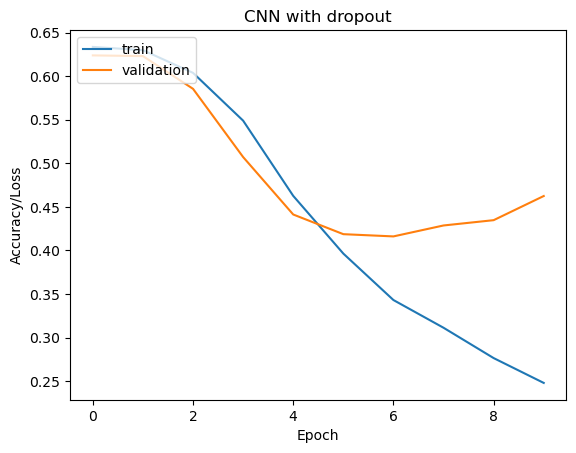

In [63]:
show_train_history_CNN_D('accuracy', 'val_accuracy')
show_train_history_CNN_D('loss', 'val_loss')

In [132]:
#評估模型準確度
scores = model_CNN_D.evaluate(x_test, y_test)#放入測試資料進行評估
print("Accuracy=",scores[1])#列印準確度

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8134 - loss: 0.4375
Accuracy= 0.8069999814033508


In [ ]:
#CNN with dropout by word2Vec

In [65]:
#Word2vec

rows = len(df_train)
text_w2v = []
token.word_index.items()

#處理文本數據
for i in range(rows):
    text = df_train.loc[i, 'text']
    # 檢查是否為字串型態
    if isinstance(text, str):
        text = text.split()  # 如果是字串，則進行分詞
    text_w2v.append(text)  # 添加到清單中

text_w2v
#訓練 Word2Vec 模型
model = Word2Vec(text_w2v, vector_size=100, min_count=1)

#建立詞嵌入矩陣
num_words = len(token.word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

#填充詞嵌入矩陣
for word, i in token.word_index.items():
    try:
        embedding_matrix[i] = model.wv[word]
    except:
        pass

embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.32676744e-01, -2.96285689e-01,  2.98415571e-01, ...,
        -4.27819908e-01,  1.42403185e+00,  4.88747895e-01],
       [ 9.63698626e-02, -8.41584921e-01, -1.16434586e+00, ...,
        -3.76872152e-01, -7.38042817e-02,  3.54240686e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.78676087e-03,  4.20210185e-03,  1.37861515e-03, ...,
        -9.28148348e-03, -1.35882990e-02, -5.12807071e-03],
       [-6.50836329e-04,  4.48030233e-03,  4.16062912e-03, ...,
         2.92516802e-03,  3.20539949e-03, -1.62283238e-02]])

In [86]:
model_CNN_D2=Sequential()

#Embedding層將數字list轉換為向量list
model_CNN_D2 = Sequential([
    Input(shape=(500,)),
    Embedding(input_dim = embedding_matrix.shape[0],
                          output_dim = embedding_matrix.shape[1],
                          weights = [embedding_matrix],
                          trainable=False)
])
#建立捲積層1
model_CNN_D2.add(Conv1D(filters=50,#隨機產生幾個filter weight
                 kernel_size=2,#濾鏡大小
                 activation='relu'))#ReLU積活函數
#加入dropout
model_CNN_D2.add(Dropout(0.7))

#建立池化層1
model_CNN_D2.add(MaxPooling1D(pool_size=2))

#建立平坦層
model_CNN_D2.add(Flatten())
model_CNN_D2.add(Dropout(0.7))

#建立隱藏層
model_CNN_D2.add(Dense(50,activation='relu'))
model_CNN_D2.add(Dropout(0.7))

#建立輸出層
model_CNN_D2.add(Dense(1,activation='sigmoid'))

model_CNN_D2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)    │ (None, 500, 100)    │   6,200,600 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ conv1d_6 (Conv1D)          │ (None, 499, 50)     │      10,050 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_12 (Dropout)       │ (None, 499, 50)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ max_pooling1d_6            │ (None, 249, 50)     │           0 │
│ (MaxPooling1D)             │                     │             │
├────────────────────────────┼─────────────────────┼─────────────┤
│ flatten_6 (Flatten)        │ (None, 12450)       │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_13 (Dropout)       │ (None, 12450)       │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_12 (Dense)           │ (None, 50)          │     622,550 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_14 (Dropout)       │ (None, 50)          │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_13 (Dense)           │ (None, 1)           │          51 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 6,833,251 (26.07 MB)

 Trainable params: 632,651 (2.41 MB)

 Non-trainable params: 6,200,600 (23.65 MB)

In [88]:
#定義訓練方式
model_CNN_D2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#開始訓練
train_history_CNN_D2 = model_CNN_D2.fit(x_train, y_train, validation_split=0.2,
                        batch_size=100, #批次筆數(每次訓練多少批次: 總訓練資料/批次筆數)
                        epochs=10, #訓練週期數(10筆accuracy與loss)
                        verbose=2) #顯示訓練過程   

Epoch 1/10
64/64 - 6s - 93ms/step - accuracy: 0.6467 - loss: 0.8024 - val_accuracy: 0.6787 - val_loss: 0.6485
Epoch 2/10
64/64 - 3s - 46ms/step - accuracy: 0.6802 - loss: 0.6468 - val_accuracy: 0.6787 - val_loss: 0.6349
Epoch 3/10
64/64 - 3s - 45ms/step - accuracy: 0.6809 - loss: 0.6299 - val_accuracy: 0.6787 - val_loss: 0.6324
Epoch 4/10
64/64 - 3s - 41ms/step - accuracy: 0.6812 - loss: 0.6227 - val_accuracy: 0.6787 - val_loss: 0.6216
Epoch 5/10
64/64 - 3s - 43ms/step - accuracy: 0.6828 - loss: 0.6132 - val_accuracy: 0.6787 - val_loss: 0.6131
Epoch 6/10
64/64 - 3s - 40ms/step - accuracy: 0.6809 - loss: 0.6060 - val_accuracy: 0.6787 - val_loss: 0.6121
Epoch 7/10
64/64 - 3s - 40ms/step - accuracy: 0.6834 - loss: 0.5983 - val_accuracy: 0.6812 - val_loss: 0.5857
Epoch 8/10
64/64 - 3s - 46ms/step - accuracy: 0.6850 - loss: 0.5947 - val_accuracy: 0.6819 - val_loss: 0.5969
Epoch 9/10
64/64 - 3s - 46ms/step - accuracy: 0.6833 - loss: 0.5899 - val_accuracy: 0.6794 - val_loss: 0.5898
Epoch 10/1

In [90]:
#畫出accuracy&loss
def show_train_history_CNN_D2(train,val):
    plt.figure()
    plt.plot(train_history_CNN_D2.history[train])
    plt.plot(train_history_CNN_D2.history[val])
    plt.title("CNN with dropout by word2Vec")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

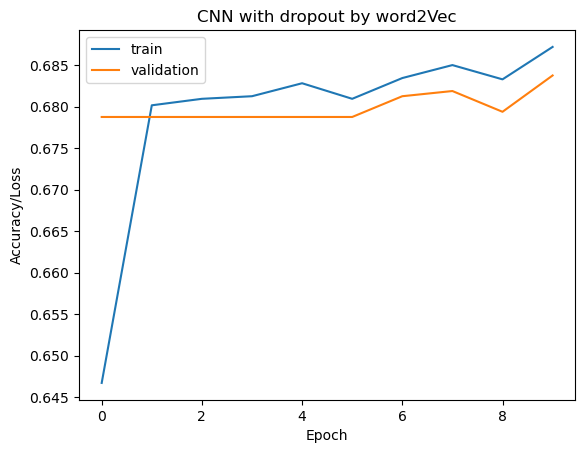

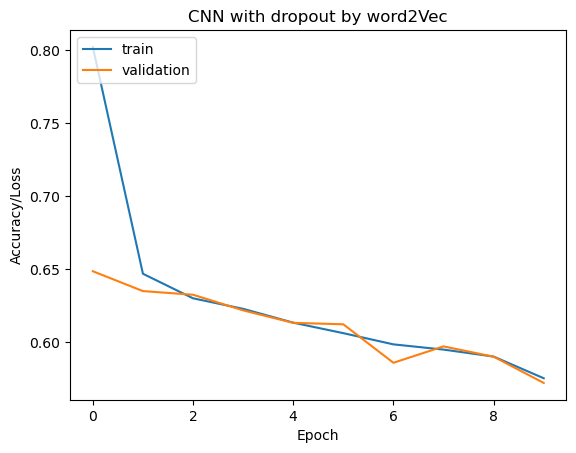

In [91]:
show_train_history_CNN_D2('accuracy', 'val_accuracy')
show_train_history_CNN_D2('loss', 'val_loss')

In [94]:
#評估模型準確度
scores = model_CNN_D2.evaluate(x_test, y_test)#放入測試資料進行評估
print("Accuracy=",scores[1])#列印準確度

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7103 - loss: 0.5601
Accuracy= 0.7105000019073486


In [96]:
#LSTM without dropout
modelLSTM=Sequential()#建立模型

modelLSTM = Sequential([
    Input(shape=(500,)),#數字list截長補短後都是500個數字
    Embedding(input_dim=5000, #輸入維度是5000，也就是我們之前建立的字典是5000字
              output_dim=100) #輸出維度100，希望將數字list轉換為100維度的向量
])
#建立神經網路
#建立LSTM層
modelLSTM.add(LSTM(30))

#建立隱藏層
modelLSTM.add(Dense(units=50,
                    activation='relu'))
#建立輸出層
modelLSTM.add(Dense(units=1,
                    activation='sigmoid'))
#查看模型摘要
modelLSTM.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)    │ (None, 500, 100)    │     500,000 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm (LSTM)                │ (None, 30)          │      15,720 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_14 (Dense)           │ (None, 50)          │       1,550 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_15 (Dense)           │ (None, 1)           │          51 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 517,321 (1.97 MB)

 Trainable params: 517,321 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
#定義訓練方式
modelLSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#開始訓練
train_history_LSTM = modelLSTM.fit(x_train, y_train, validation_split=0.2,
                        batch_size=100, #批次筆數(每次訓練多少批次: 總訓練資料/批次筆數)
                        epochs=10, #訓練週期數(10筆accuracy與loss)
                        verbose=2) #顯示訓練過程   

Epoch 1/10
64/64 - 16s - 245ms/step - accuracy: 0.6809 - loss: 0.6201 - val_accuracy: 0.6812 - val_loss: 0.5679
Epoch 2/10
64/64 - 11s - 168ms/step - accuracy: 0.7886 - loss: 0.4500 - val_accuracy: 0.7875 - val_loss: 0.4565
Epoch 3/10
64/64 - 10s - 164ms/step - accuracy: 0.8722 - loss: 0.3063 - val_accuracy: 0.8075 - val_loss: 0.4786
Epoch 4/10
64/64 - 11s - 167ms/step - accuracy: 0.9083 - loss: 0.2309 - val_accuracy: 0.8062 - val_loss: 0.4919
Epoch 5/10
64/64 - 10s - 164ms/step - accuracy: 0.9413 - loss: 0.1604 - val_accuracy: 0.7850 - val_loss: 0.5904
Epoch 6/10
64/64 - 10s - 163ms/step - accuracy: 0.9564 - loss: 0.1257 - val_accuracy: 0.7937 - val_loss: 0.6812
Epoch 7/10
64/64 - 11s - 167ms/step - accuracy: 0.9719 - loss: 0.0889 - val_accuracy: 0.7887 - val_loss: 0.7931
Epoch 8/10
64/64 - 11s - 168ms/step - accuracy: 0.9777 - loss: 0.0702 - val_accuracy: 0.7894 - val_loss: 0.9329
Epoch 9/10
64/64 - 10s - 158ms/step - accuracy: 0.9808 - loss: 0.0583 - val_accuracy: 0.7806 - val_loss:

In [100]:
#畫出accuracy&loss
def show_train_history_LSTM(train,val):
    plt.figure()
    plt.plot(train_history_LSTM.history[train])
    plt.plot(train_history_LSTM.history[val])
    plt.title("LSTM without dropout")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

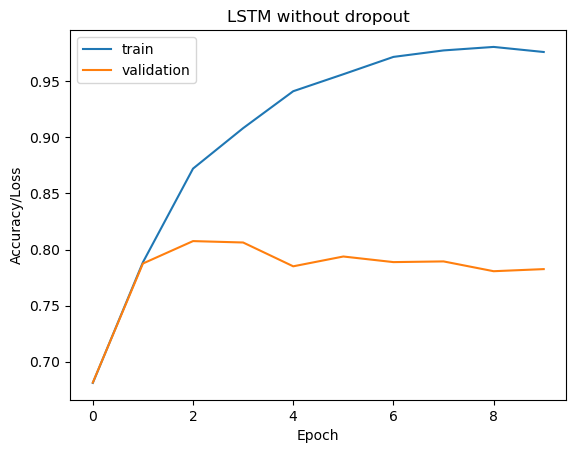

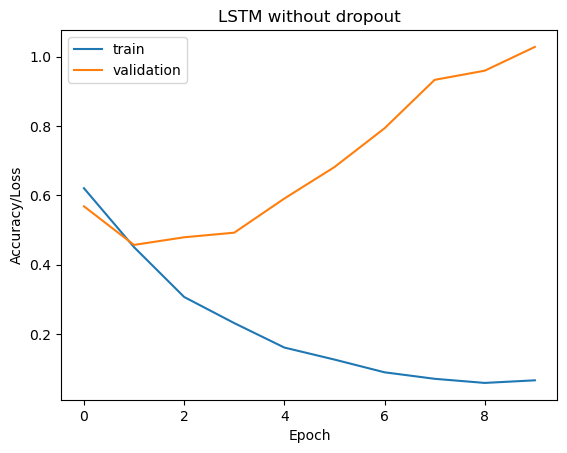

In [102]:
show_train_history_LSTM('accuracy', 'val_accuracy')
show_train_history_LSTM('loss', 'val_loss')

In [104]:
#評估模型準確度
scores = modelLSTM.evaluate(x_test, y_test)#放入測試資料進行評估
print("Accuracy=",scores[1])#列印準確度

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7903 - loss: 0.9967
Accuracy= 0.7829999923706055


In [106]:
#LSTM with dropout

modelLSTM_D=Sequential()#建立模型

modelLSTM_D = Sequential([
    Input(shape=(500,)),#數字list截長補短後都是500個數字
    Embedding(input_dim=5000, #輸入維度是5000，也就是我們之前建立的字典是5000字
              output_dim=100) #輸出維度100，希望將數字list轉換為100維度的向量
])
#加入dropout
modelLSTM_D.add(Dropout(0.7))

#建立神經網路
#建立LSTM層
modelLSTM_D.add(LSTM(30))

#建立隱藏層
modelLSTM_D.add(Dense(units=50,
                    activation='relu'))
modelLSTM_D.add(Dropout(0.7))

#建立輸出層
modelLSTM_D.add(Dense(units=1,
                    activation='sigmoid'))
#查看模型摘要
modelLSTM_D.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)    │ (None, 500, 100)    │     500,000 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_15 (Dropout)       │ (None, 500, 100)    │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_1 (LSTM)              │ (None, 30)          │      15,720 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_16 (Dense)           │ (None, 50)          │       1,550 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_16 (Dropout)       │ (None, 50)          │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_17 (Dense)           │ (None, 1)           │          51 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 517,321 (1.97 MB)

 Trainable params: 517,321 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
#定義訓練方式
modelLSTM_D.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#開始訓練
train_history_LSTM_D = modelLSTM_D.fit(x_train, y_train, validation_split=0.2,
                        batch_size=100, #批次筆數(每次訓練多少批次: 總訓練資料/批次筆數)
                        epochs=10, #訓練週期數(10筆accuracy與loss)
                        verbose=2) #顯示訓練過程   

Epoch 1/10
64/64 - 15s - 227ms/step - accuracy: 0.6614 - loss: 0.6502 - val_accuracy: 0.6787 - val_loss: 0.6130
Epoch 2/10
64/64 - 10s - 158ms/step - accuracy: 0.7083 - loss: 0.5524 - val_accuracy: 0.7688 - val_loss: 0.4850
Epoch 3/10
64/64 - 11s - 169ms/step - accuracy: 0.8148 - loss: 0.4311 - val_accuracy: 0.7900 - val_loss: 0.4448
Epoch 4/10
64/64 - 11s - 171ms/step - accuracy: 0.8705 - loss: 0.3331 - val_accuracy: 0.8037 - val_loss: 0.4371
Epoch 5/10
64/64 - 11s - 167ms/step - accuracy: 0.8903 - loss: 0.2851 - val_accuracy: 0.8012 - val_loss: 0.4921
Epoch 6/10
64/64 - 11s - 169ms/step - accuracy: 0.9080 - loss: 0.2491 - val_accuracy: 0.8150 - val_loss: 0.5077
Epoch 7/10
64/64 - 11s - 172ms/step - accuracy: 0.9231 - loss: 0.2131 - val_accuracy: 0.7875 - val_loss: 0.5574
Epoch 8/10
64/64 - 11s - 165ms/step - accuracy: 0.9316 - loss: 0.1923 - val_accuracy: 0.7831 - val_loss: 0.5921
Epoch 9/10
64/64 - 10s - 163ms/step - accuracy: 0.9427 - loss: 0.1632 - val_accuracy: 0.8006 - val_loss:

In [110]:
#畫出accuracy&loss
def show_train_history_LSTM_D(train,val):
    plt.figure()
    plt.plot(train_history_LSTM_D.history[train])
    plt.plot(train_history_LSTM_D.history[val])
    plt.title("LSTM with dropout")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

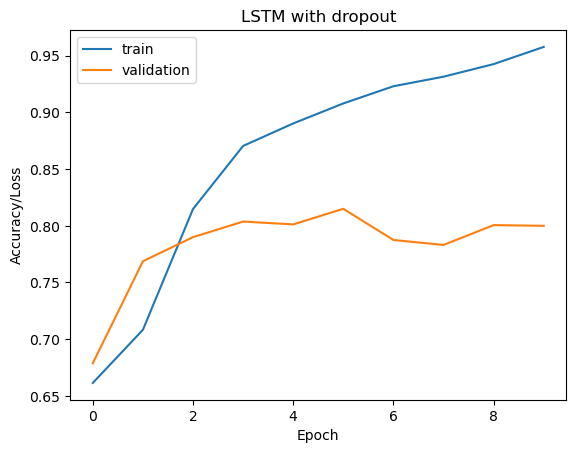

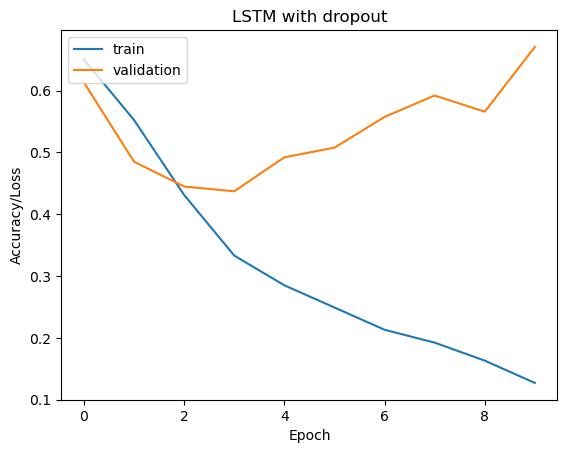

In [111]:
show_train_history_LSTM_D('accuracy', 'val_accuracy')
show_train_history_LSTM_D('loss', 'val_loss')

In [115]:
#評估模型準確度
scores = modelLSTM_D.evaluate(x_test, y_test)#放入測試資料進行評估
print("Accuracy=",scores[1])#列印準確度

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8056 - loss: 0.6527
Accuracy= 0.8065000176429749


In [118]:
#LSTM with dropout by word2Vec
#Word2vec
modelLSTM_D2=Sequential()#建立模型

modelLSTM_D2 = Sequential([
    Input(shape=(500,)),#數字list截長補短後都是500個數字
    Embedding(input_dim = embedding_matrix.shape[0],
                           output_dim = embedding_matrix.shape[1],
                           weights = [embedding_matrix],
                           trainable=False)
])
#加入dropout
modelLSTM_D2.add(Dropout(0.7))
#建立神經網路
#建立LSTM層
modelLSTM_D2.add(LSTM(30))

#建立隱藏層
modelLSTM_D2.add(Dense(units=50,
                    activation='relu'))
modelLSTM_D2.add(Dropout(0.7))

#建立輸出層
modelLSTM_D2.add(Dense(units=1,
                    activation='sigmoid'))
#查看模型摘要
modelLSTM_D2.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)    │ (None, 500, 100)    │   6,200,600 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_17 (Dropout)       │ (None, 500, 100)    │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_2 (LSTM)              │ (None, 30)          │      15,720 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_18 (Dense)           │ (None, 50)          │       1,550 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_18 (Dropout)       │ (None, 50)          │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_19 (Dense)           │ (None, 1)           │          51 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 6,217,921 (23.72 MB)

 Trainable params: 17,321 (67.66 KB)

 Non-trainable params: 6,200,600 (23.65 MB)

In [120]:
#定義訓練方式
modelLSTM_D2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#開始訓練
train_history_LSTM_D2 = modelLSTM_D2.fit(x_train, y_train, validation_split=0.2,
                        batch_size=100, #批次筆數(每次訓練多少批次: 總訓練資料/批次筆數)
                        epochs=10, #訓練週期數(10筆accuracy與loss)
                        verbose=2) #顯示訓練過程   

Epoch 1/10
64/64 - 12s - 193ms/step - accuracy: 0.6470 - loss: 0.6563 - val_accuracy: 0.6787 - val_loss: 0.6244
Epoch 2/10
64/64 - 9s - 139ms/step - accuracy: 0.6756 - loss: 0.6362 - val_accuracy: 0.6787 - val_loss: 0.6213
Epoch 3/10
64/64 - 9s - 148ms/step - accuracy: 0.6789 - loss: 0.6345 - val_accuracy: 0.6787 - val_loss: 0.6198
Epoch 4/10
64/64 - 9s - 136ms/step - accuracy: 0.6806 - loss: 0.6322 - val_accuracy: 0.6787 - val_loss: 0.6170
Epoch 5/10
64/64 - 8s - 133ms/step - accuracy: 0.6816 - loss: 0.6262 - val_accuracy: 0.6787 - val_loss: 0.6129
Epoch 6/10
64/64 - 9s - 135ms/step - accuracy: 0.6809 - loss: 0.6162 - val_accuracy: 0.6787 - val_loss: 0.5998
Epoch 7/10
64/64 - 9s - 139ms/step - accuracy: 0.6820 - loss: 0.6126 - val_accuracy: 0.6787 - val_loss: 0.5813
Epoch 8/10
64/64 - 9s - 134ms/step - accuracy: 0.6805 - loss: 0.6060 - val_accuracy: 0.6775 - val_loss: 0.5748
Epoch 9/10
64/64 - 9s - 139ms/step - accuracy: 0.6825 - loss: 0.6001 - val_accuracy: 0.6775 - val_loss: 0.5954


In [122]:
#畫出accuracy&loss
def show_train_history_LSTM_D2(train,val):
    plt.figure()
    plt.plot(train_history_LSTM_D2.history[train])
    plt.plot(train_history_LSTM_D2.history[val])
    plt.title("LSTM with dropout by word2Vec")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

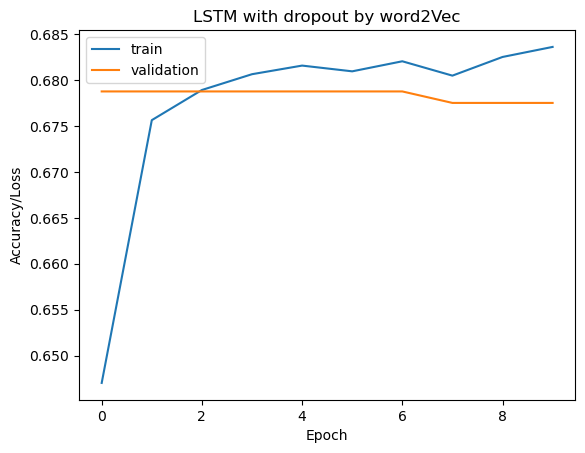

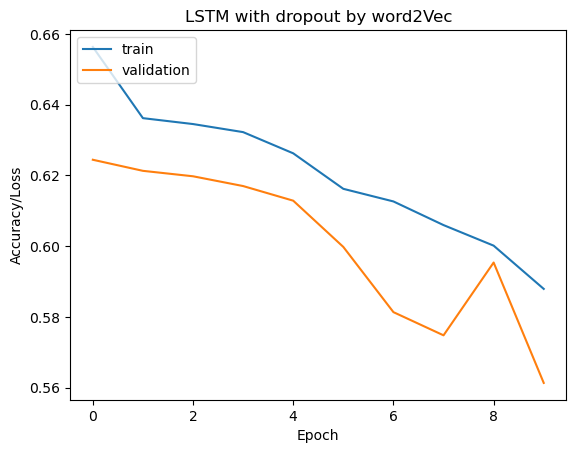

In [123]:
show_train_history_LSTM_D2('accuracy', 'val_accuracy')
show_train_history_LSTM_D2('loss', 'val_loss')

In [126]:
#評估模型準確度
scores = modelLSTM_D2.evaluate(x_test, y_test)#放入測試資料進行評估
print("Accuracy=",scores[1])#列印準確度

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7089 - loss: 0.5426
Accuracy= 0.7099999785423279
